In [84]:
library(dplyr) 
library(ggplot2) 
library(caret)  
library(ROSE)

In [85]:
#Load the data
data_fraud <- read.csv("C:/Users/ADMIN/Downloads/fraud.csv")
head(data_fraud)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.6980436,-0.04419812,1.6811673,0.9745233,-0.245692619,0.34715606,0.19516625,0.08370937,0.3320762,...,-0.02528877,0.38346201,-0.17712600,0.1105104,0.2466123,-0.3923114,0.33748690,-0.06418093,149.62,0
0,0.6118281,0.16162642,0.1103481,0.3168994,0.043585540,-0.06183566,-0.06418938,0.07217789,-0.2331601,...,-0.31188331,-0.88147339,0.16239800,-0.5611484,0.3207289,0.2611633,-0.02269927,0.04488712,2.69,0
1,-0.6972977,-0.81384628,1.1753368,0.2685503,-0.365428546,1.35179670,0.64468863,0.21006306,-1.3826241,...,0.34258177,1.06504576,1.45808689,-1.1381284,-0.6286053,-0.2885504,-0.13987025,-0.18215547,378.66,0
1,-0.4960260,-0.11248295,1.1884502,-0.6104519,-0.007486433,0.93638751,0.19354560,0.32011743,-1.2661192,...,-0.14960499,0.00727844,-0.30514637,-1.9410890,1.2420391,-0.4603827,0.15849354,0.18735562,123.50,0
2,-0.5945675,0.53302677,1.0265370,0.2849940,-0.295708736,0.07201686,0.48298296,-0.22944885,0.7464582,...,-0.01302746,1.10175693,-0.22039050,0.2332575,-0.3952447,1.0419856,0.55445514,0.65590152,69.99,0
2,-0.2186654,0.58330073,0.7563618,-0.1189747,0.305725744,-0.02231914,0.38789196,0.22078229,-0.5191011,...,-0.28767899,-0.77265121,-0.04232414,-0.6132929,-0.4466323,0.2197161,0.64143563,0.24717586,3.67,0


In [72]:
tail(data_fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283721,172785,0.06176323,0.56537527,-0.3619134,-0.5268740,0.820847627,-0.1771663,0.66200698,0.09761454,-0.1862756,...,-0.4340387,-1.1158925,0.08071584,0.16974085,-0.8362492,0.2573968,0.550709375,0.20974925,2.69,0
283722,172786,-6.09905464,6.11633378,-6.5187919,-1.4613768,-3.895744755,-1.9571871,-4.00615791,6.19592603,1.7475504,...,0.2948630,0.1543905,1.62654486,-0.84102708,2.7566211,0.5186863,2.384499716,2.51117120,0.77,0
283723,172787,-0.37616983,-0.03344895,1.3488793,-0.5222719,0.630518648,0.7946475,0.01981788,0.25008913,0.5338239,...,0.2959008,1.2758029,0.01998235,-1.67797370,-1.1638533,-0.8199412,0.173022183,-0.16318002,24.79,0
283724,172788,0.98538976,-0.18294365,-2.1539595,-0.3944523,1.910311768,2.2758394,-0.24178159,0.60083502,0.3947577,...,0.3205443,0.7980521,-0.06012620,1.05697765,0.5098524,-0.1812469,0.011256705,-0.08097157,67.88,0
283725,172788,-0.12342753,0.32214827,0.4656450,0.4877719,-0.274479929,0.4682734,-0.55893147,0.57600857,0.3579091,...,0.3664062,1.1042002,-0.26182030,0.20343430,-1.0919737,1.1340424,0.274977681,0.31867178,10.00,0
283726,172792,-0.27382206,-0.11522013,0.4661933,-0.3579953,-0.009110823,-0.4877256,1.28455863,-0.35168046,0.4437999,...,0.3606216,0.8875551,0.60409745,0.01452608,-0.9087303,-1.6974632,-0.006103212,0.04160917,217.00,0


In [86]:
dim(data_fraud)

[1] 283726     31

In [87]:
summary(data_fraud)

      Time              V1                   V2                  V3           
 Min.   :     0   Min.   :-28.956239   Min.   :-44.15838   Min.   :-32.03166  
 1st Qu.: 54205   1st Qu.: -0.470195   1st Qu.: -0.36456   1st Qu.: -0.58971  
 Median : 84693   Median :  0.010464   Median :  0.03883   Median :  0.11928  
 Mean   : 94811   Mean   :  0.003038   Mean   : -0.00251   Mean   :  0.00107  
 3rd Qu.:139298   3rd Qu.:  0.675590   3rd Qu.:  0.48599   3rd Qu.:  0.68070  
 Max.   :172792   Max.   :  1.260214   Max.   : 13.39509   Max.   :  6.21904  
       V4                  V5                  V6           
 Min.   :-4.018693   Min.   :-82.60176   Min.   :-19.64104  
 1st Qu.:-0.601148   1st Qu.: -0.50096   1st Qu.: -0.57738  
 Median :-0.015732   Median : -0.03883   Median : -0.20659  
 Mean   :-0.002098   Mean   :  0.00133   Mean   : -0.00086  
 3rd Qu.: 0.523020   3rd Qu.:  0.44460   3rd Qu.:  0.29791  
 Max.   :11.932920   Max.   : 25.27339   Max.   : 55.03412  
       V7           

In [97]:
table(data_fraud$Class)


     0      1 
283253    473 

In [101]:
#checking for the null values
sum(is.na(data_fraud))

[1] 0

In [89]:
colnames(data_fraud)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [90]:
str(data_fraud)

'data.frame':	283726 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -0.698 0.612 -0.697 -0.496 -0.595 ...
 $ V2    : num  -0.0442 0.1616 -0.8138 -0.1125 0.533 ...
 $ V3    : num  1.68 0.11 1.18 1.19 1.03 ...
 $ V4    : num  0.975 0.317 0.269 -0.61 0.285 ...
 $ V5    : num  -0.24569 0.04359 -0.36543 -0.00749 -0.29571 ...
 $ V6    : num  0.3472 -0.0618 1.3518 0.9364 0.072 ...
 $ V7    : num  0.1952 -0.0642 0.6447 0.1935 0.483 ...
 $ V8    : num  0.0837 0.0722 0.2101 0.3201 -0.2294 ...
 $ V9    : num  0.332 -0.233 -1.383 -1.266 0.746 ...
 $ V10   : num  0.0843 -0.1551 0.1929 -0.0511 0.6996 ...
 $ V11   : num  -0.541 1.583 0.613 -0.222 -0.808 ...
 $ V12   : num  -0.6211 1.0709 0.0664 0.1792 0.5411 ...
 $ V13   : num  -0.996 0.491 0.721 0.51 1.352 ...
 $ V14   : num  -0.327 -0.151 -0.174 -0.302 -1.176 ...
 $ V15   : num  1.605 0.695 2.564 -0.69 0.191 ...
 $ V16   : num  -0.538 0.531 -3.308 -1.213 -0.517 ...
 $ V17   : num  0.247 -0.136 1.317 -0.812 -0.281 ...

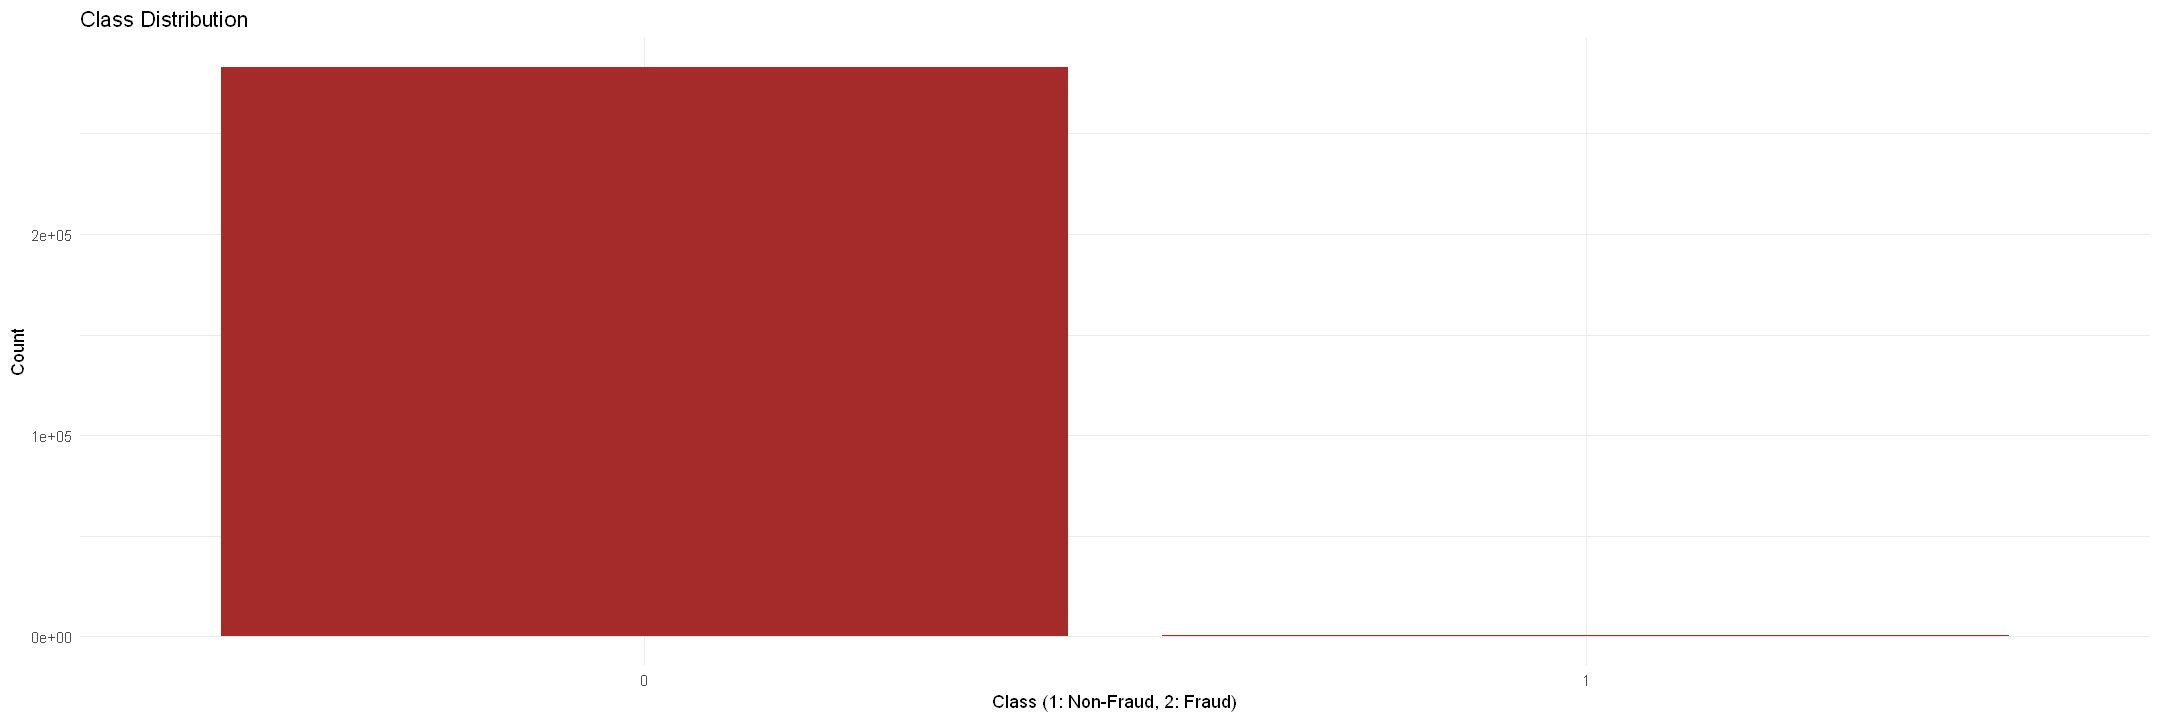

In [141]:
# Create a bar plot for class distribution
ggplot(data = data_fraud, aes(x = factor(Class))) +
  geom_bar(fill = "brown") +
  labs(title = "Class Distribution",
       x = "Class (1: Non-Fraud, 2: Fraud)",
       y = "Count") +
  theme_minimal()


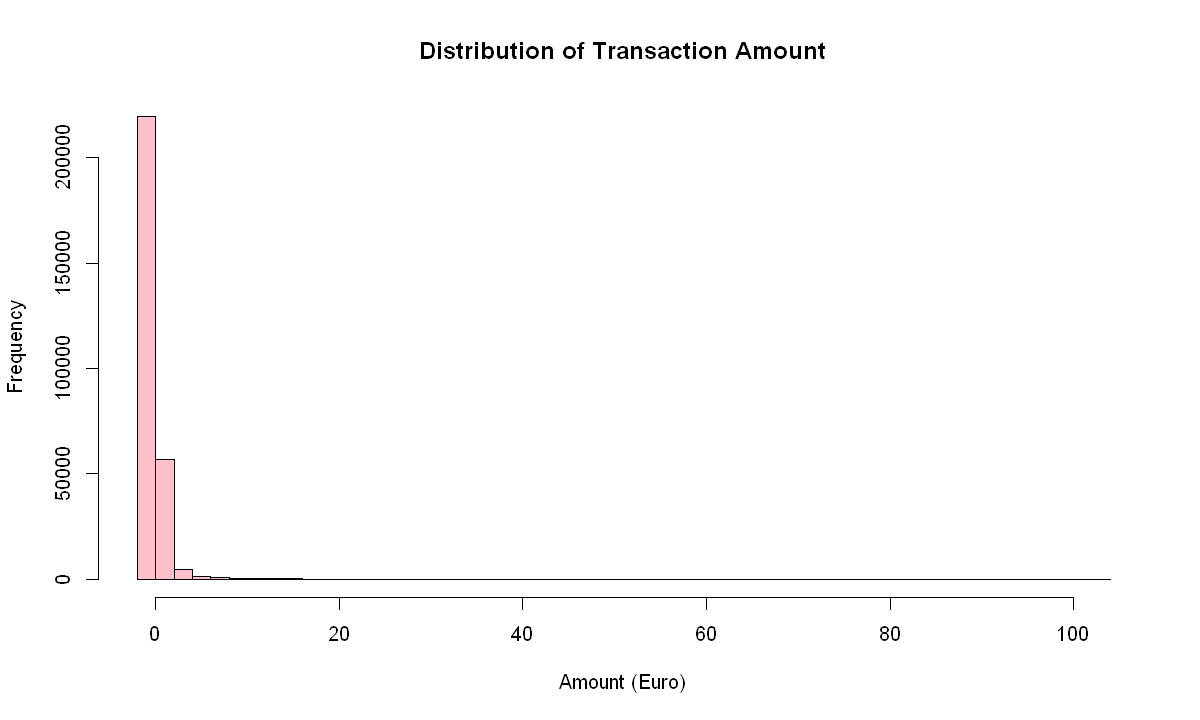

In [149]:
# Set up the figure size
options(repr.plot.width=10, repr.plot.height=6)

# Create a histogram for the distribution of transaction amounts
hist(data_fraud$Amount, breaks = 50, col = "pink", main = "Distribution of Transaction Amount", xlab = "Amount (Euro)", ylab = "Frequency")


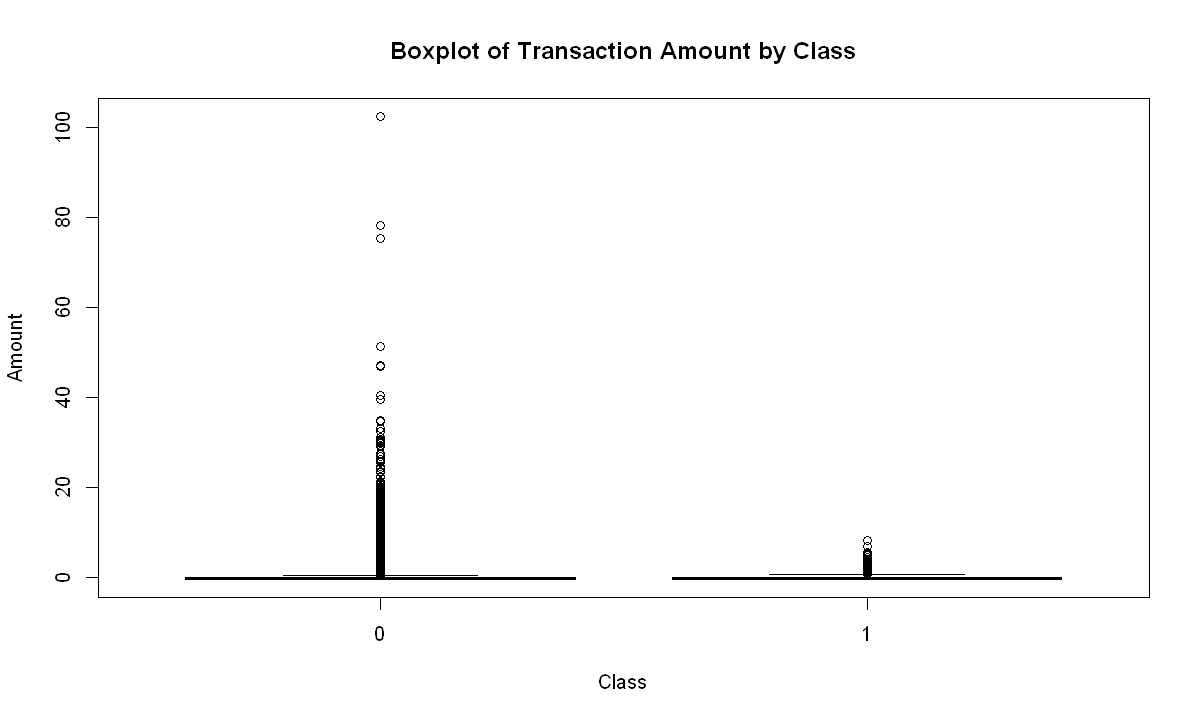

In [167]:
# Boxplot of Amount by Class
boxplot(Amount ~ Class, data = data_fraud, main = "Boxplot of Transaction Amount by Class", xlab = "Class", ylab = "Amount")

In [146]:
# Log transformation for Amount
data_fraud$Amount_log <- log1p(data_fraud$Amount)

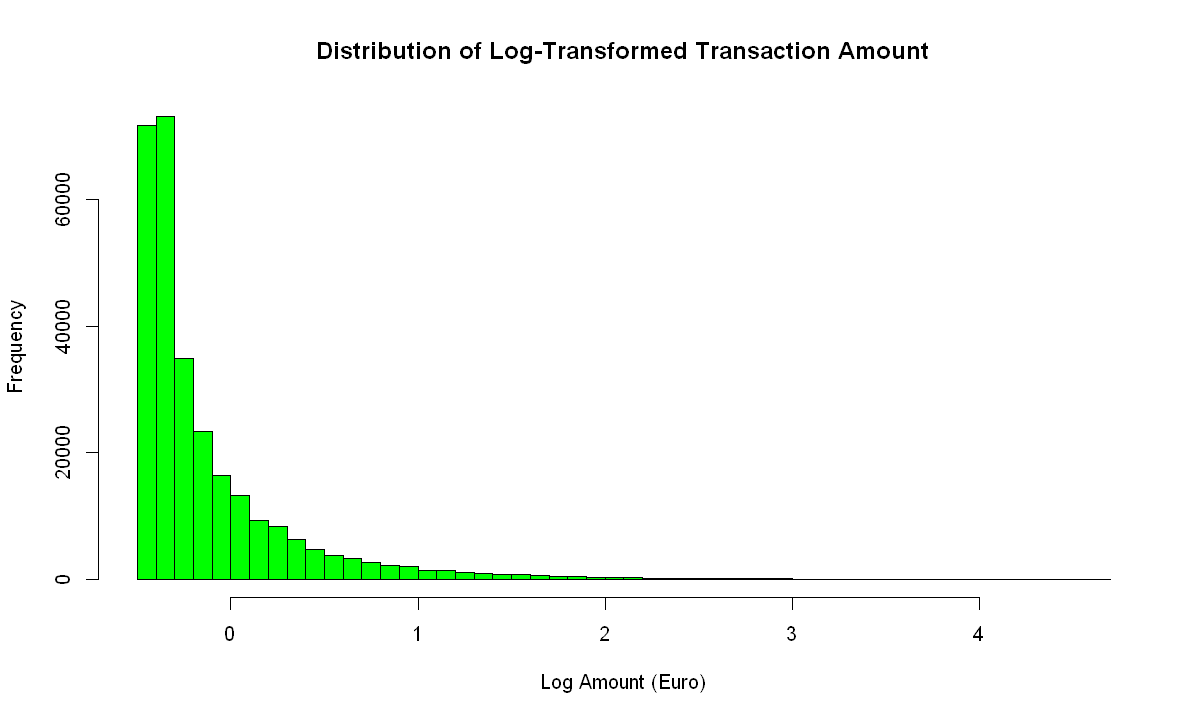

In [148]:
# Updated Distribution of Amount after log transformation
hist(data_fraud$Amount_log, breaks = 50, main = "Distribution of Log-Transformed Transaction Amount", xlab = "Log Amount (Euro)", ylab = "Frequency", col = "green", border = "black")


In [150]:
# Splitting the dataset into features (X) and target variable (y)
X <- data_fraud[, !(names(data_fraud) %in% c("Class", "Amount"))]  # log transformed 'Amount' is already in the dataset
y <- data_fraud$Class

# Load the necessary library for splitting
library(caTools)

# Splitting the data into train and test sets
set.seed(42)  # Set random seed for reproducibility
split <- sample.split(y, SplitRatio = 0.8)
X_train <- X[split, ]
X_test <- X[!split, ]
y_train <- y[split]
y_test <- y[!split]


## Applying Logistic Regression

In [181]:
# Load the caret package
library(caret)

# Convert y_test and y_pred to factors
y_test <- factor(y_test, levels = c(0, 1))
y_pred <- factor(y_pred, levels = c(0, 1))

# Classification report
conf_matrix <- confusionMatrix(y_pred, y_test)
print("Confusion Matrix:")
print(conf_matrix)



[1] "Confusion Matrix:"
Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56642    35
         1     9    60
                                         
               Accuracy : 0.9992         
                 95% CI : (0.999, 0.9994)
    No Information Rate : 0.9983         
    P-Value [Acc > NIR] : 3.895e-09      
                                         
                  Kappa : 0.7313         
                                         
 Mcnemar's Test P-Value : 0.000164       
                                         
            Sensitivity : 0.9998         
            Specificity : 0.6316         
         Pos Pred Value : 0.9994         
         Neg Pred Value : 0.8696         
             Prevalence : 0.9983         
         Detection Rate : 0.9982         
   Detection Prevalence : 0.9988         
      Balanced Accuracy : 0.8157         
                                         
       'Positive' Class : 0              
              

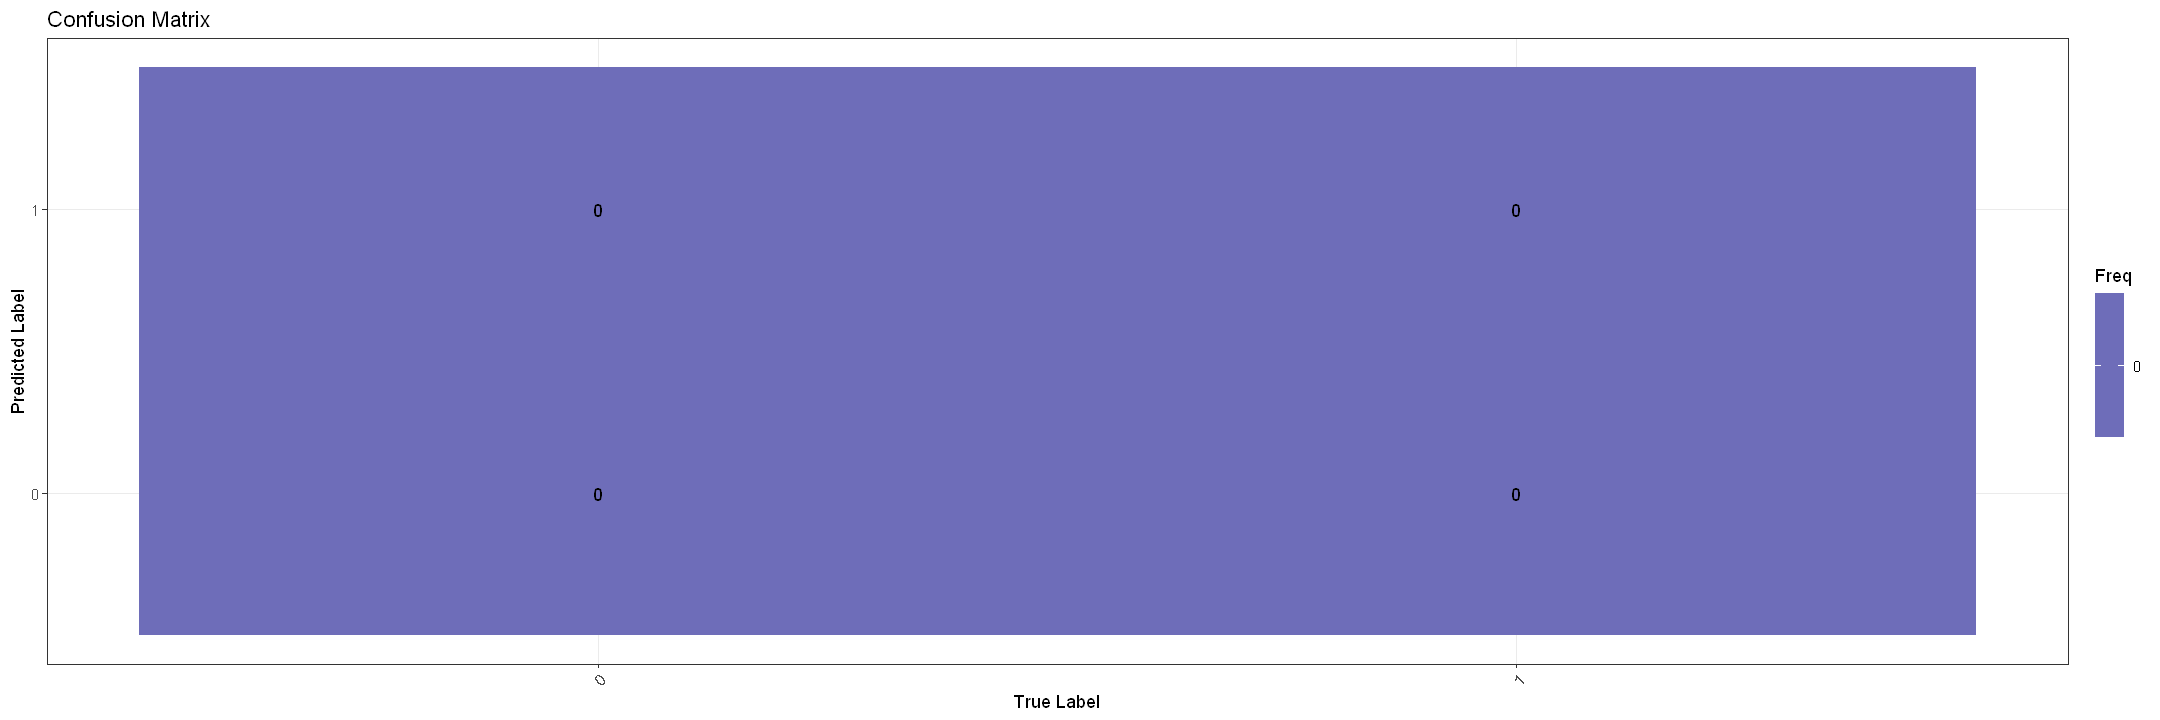

In [179]:
 # Convert confusion matrix to data frame
conf_df <- as.data.frame(as.table(conf_matrix))
colnames(conf_df) <- c("Actual", "Predicted", "Freq")

# Plotting confusion matrix
ggplot(data = conf_df, aes(x = Actual, y = Predicted, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), color = "black") +
  scale_fill_gradient(low = "lightblue", high = "darkblue") +
  labs(title = "Confusion Matrix", x = "True Label", y = "Predicted Label") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [183]:
# Calculate the weighted accuracy
weights <- ifelse(y == 0, 1, 283726/473)
weighted_accuracy <- sum(weights * (y == y_pred)) / sum(weights)

# Print the weighted accuracy
print("Weighted Accuracy on Complete Dataset:", weighted_accuracy)

Warning message in `==.default`(y, y_pred):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"

[1] "Weighted Accuracy on Complete Dataset:"


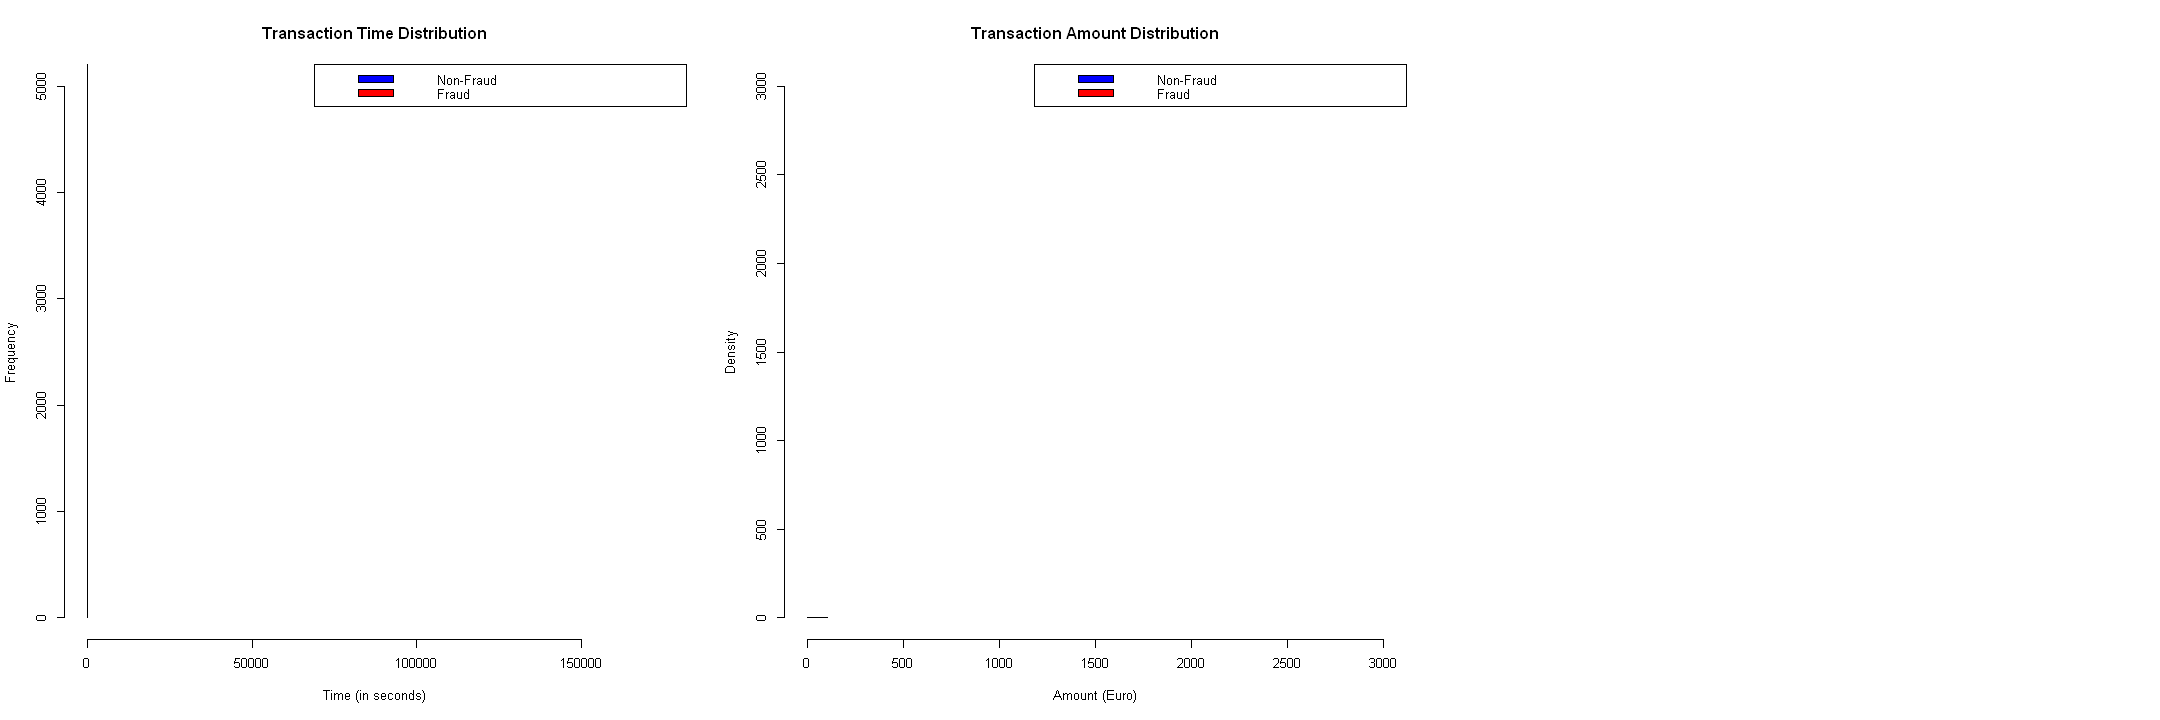

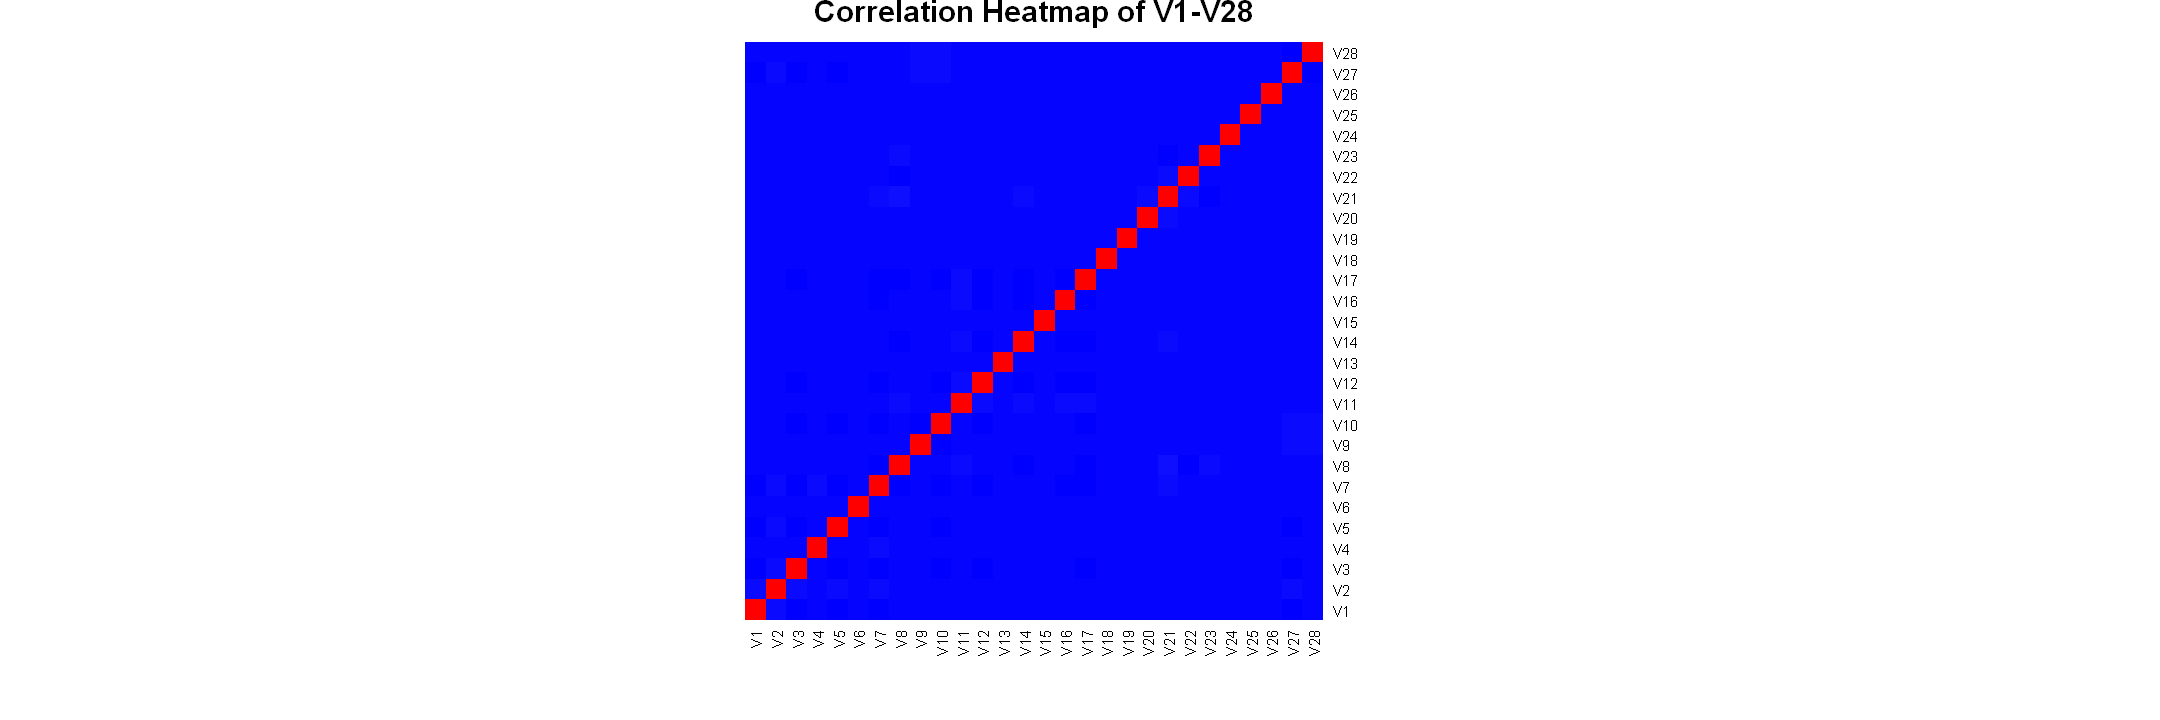

In [175]:
 # Set up the figure size and layout
par(mfrow=c(1, 3))
options(repr.plot.width=18, repr.plot.height=6)  #

# Plotting the distribution of transactions over time
hist(data_fraud$Time[data_fraud$Class == 0], breaks=50, col='blue', main='Transaction Time Distribution', xlab='Time (in seconds)', ylim=c(0, 5000), xlim=c(0, 175000))
hist(data_fraud$Time[data_fraud$Class == 1], breaks=50, col='red', add=TRUE)
legend('topright', legend=c('Non-Fraud', 'Fraud'), fill=c('blue', 'red'))

# Plotting the distribution of transaction amounts
hist(data_fraud$Amount[data_fraud$Class == 0], breaks=100, col='blue', main='Transaction Amount Distribution', xlab='Amount (Euro)', ylim=c(0, 3000), xlim=c(0, 3000), prob=TRUE)
hist(data_fraud$Amount[data_fraud$Class == 1], breaks=100, col='red', add=TRUE, prob=TRUE)
legend('topright', legend=c('Non-Fraud', 'Fraud'), fill=c('blue', 'red'))

# Plotting the correlation of features V1 to V28
corr <- cor(data_fraud[, 2:29])
heatmap(corr, Rowv=NA, Colv=NA, col=colorRampPalette(c("blue", "white", "red"))(100), scale="none", margins=c(5, 5), main="Correlation Heatmap of V1-V28")
